In this notebook i want to practice and learn more about convolution

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image



In [142]:
def kernel_convolution(image,kernel):
    fft_image = np.fft.fft2(image)
    width = max(image.shape[1],kernel.shape[1])
    height = max(image.shape[0],kernel.shape[0])
    kernel = np.pad(kernel,((0,height-kernel.shape[0]),(0,width-kernel.shape[1])))
    fft_kernel = (np.fft.fft2(kernel))
    mult = np.fft.fftshift(fft_kernel)*np.fft.fftshift(fft_image)
    return np.abs(np.fft.ifft2(mult))

def reduce_image(image):
    return image[::2,::2]

def image_2_rgb(image):
    return np.round(0.299*image[:, :, 0]+0.587 * image[:, :, 1]+0.114*image[:, :, 2]).astype(np.uint8)

def image_expend(image):
    tt= np.pad(image,((0,image.shape[0]),(0,image.shape[1])))
    maskx = np.arange(image.shape[1]).repeat(2)
    maskx[1::2]+=image.shape[1]
    masky = np.arange(image.shape[0]).repeat(2)
    masky[1::2]+=image.shape[0]
    mask = (np.array(masky).repeat(tt.shape[1]),np.array(np.tile(maskx,image.shape[0]*2)))
    real = (np.array(np.arange(tt.shape[0]).repeat(tt.shape[1])),np.array(np.tile(np.arange(tt.shape[1]),tt.shape[0])))
    tt[real] = tt[mask]
    return kernel_convolution(kernel_convolution(tt,np.array([[1/2,1,1/2]])),np.array([[1/2],[1],[1/2]]))

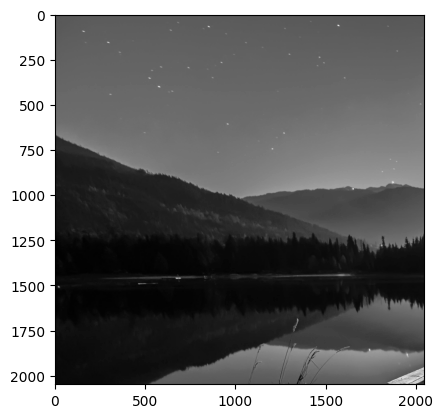

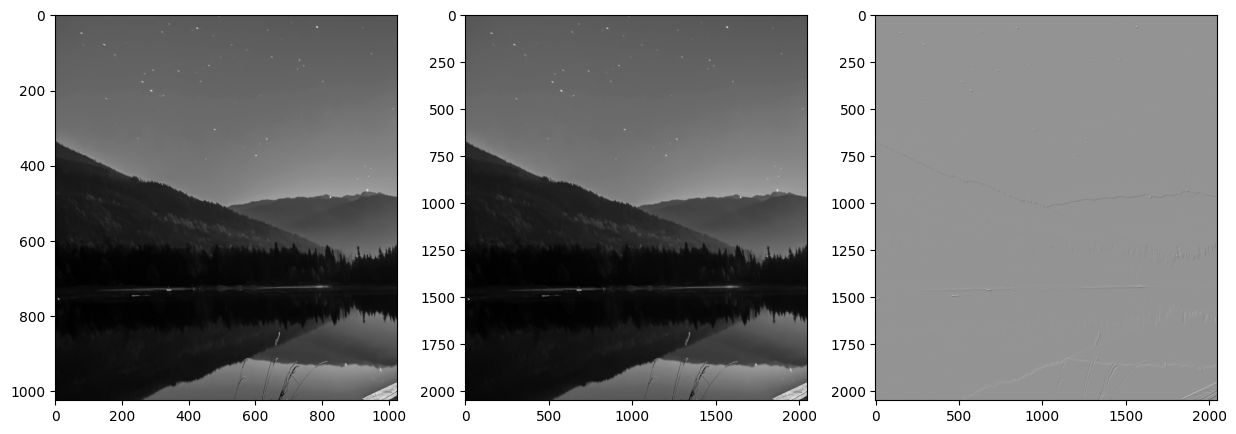

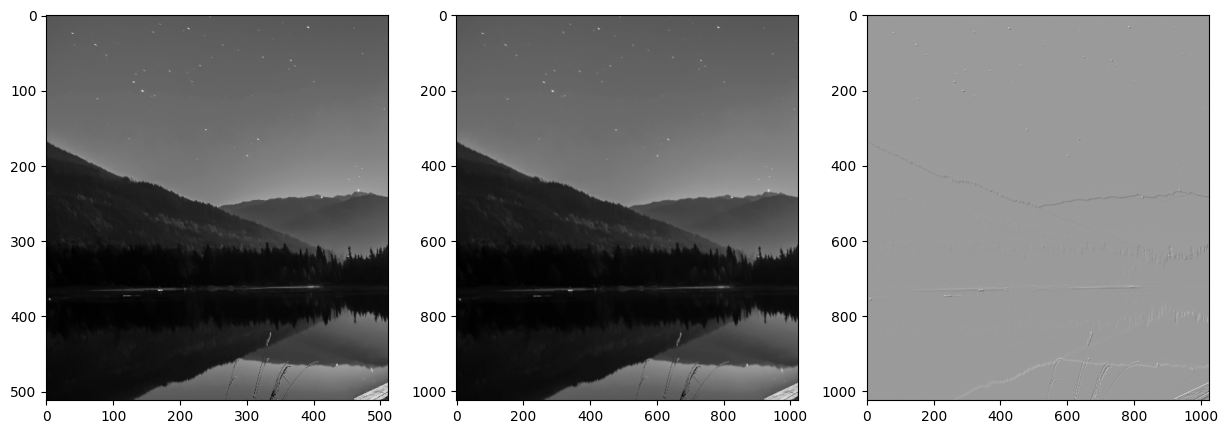

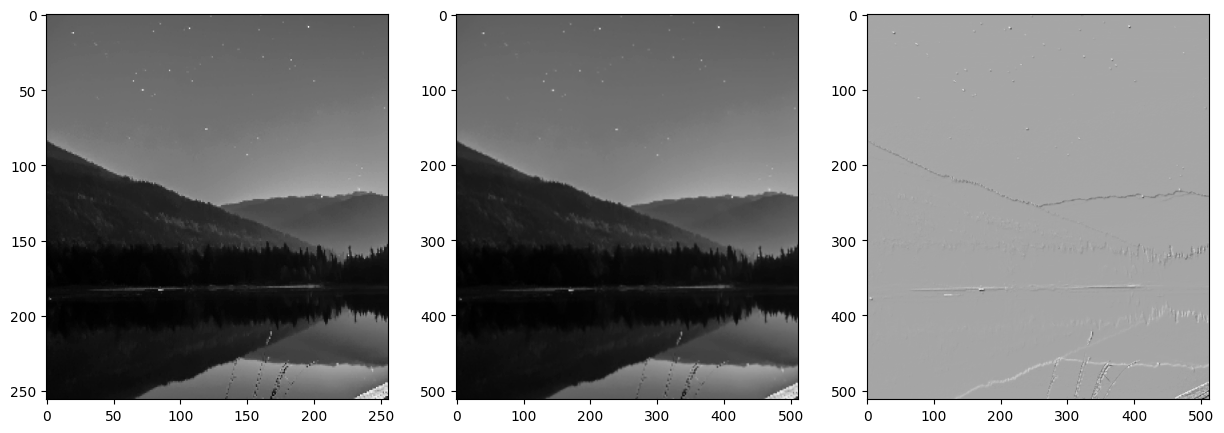

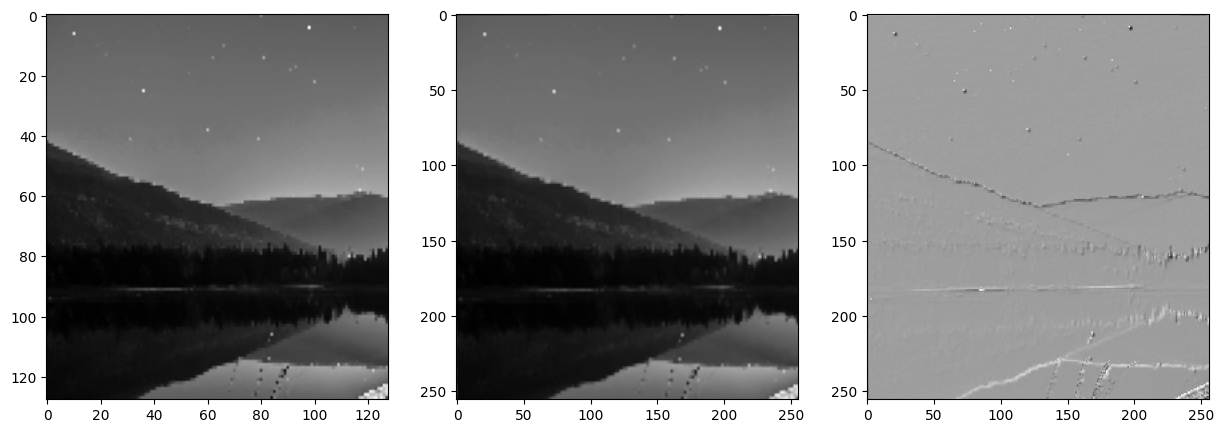

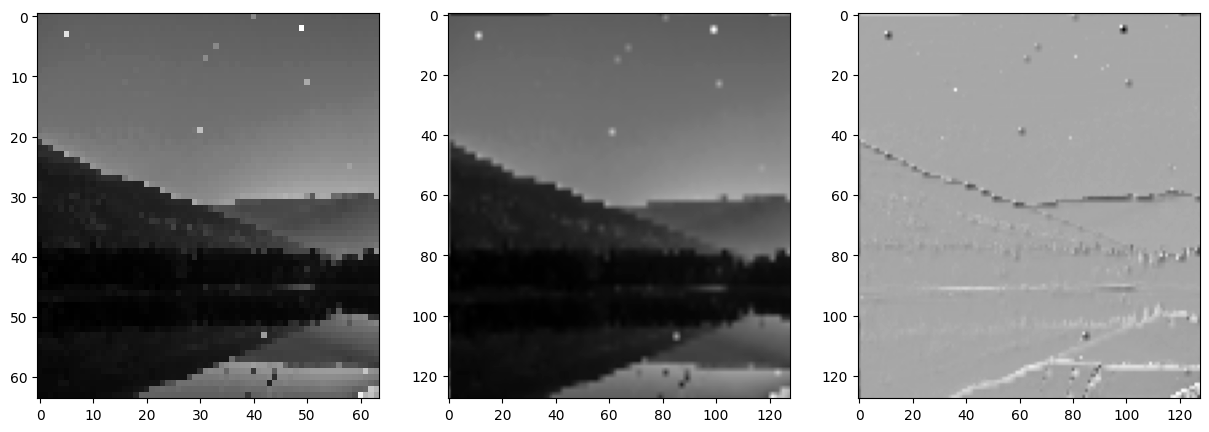

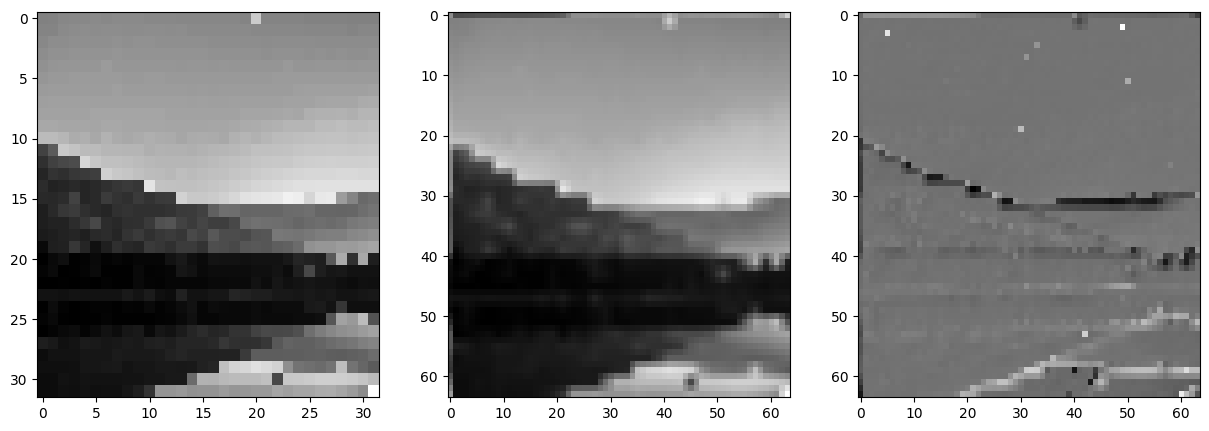

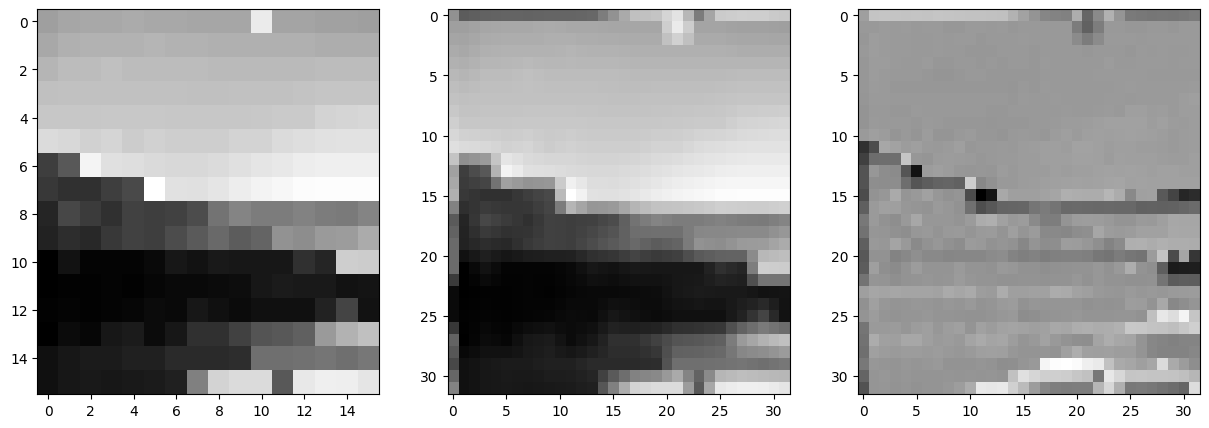

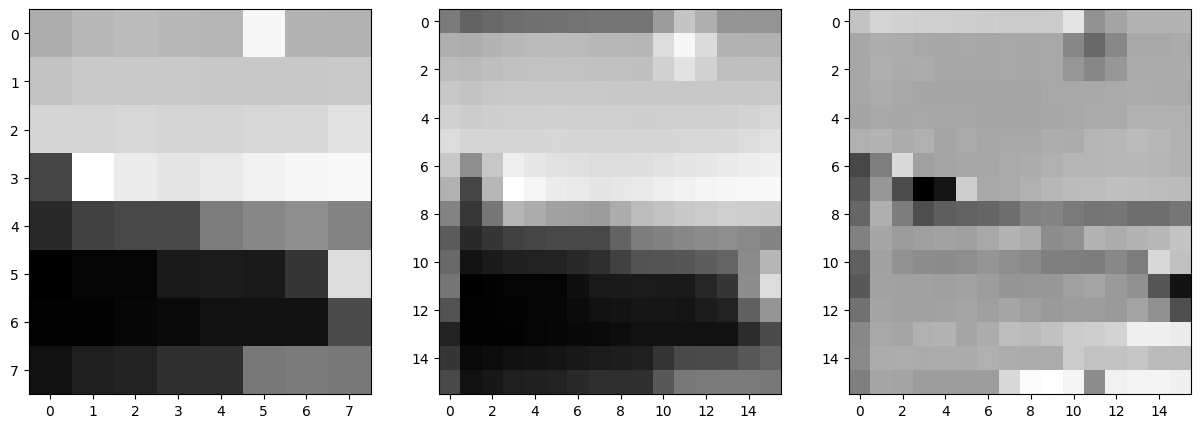

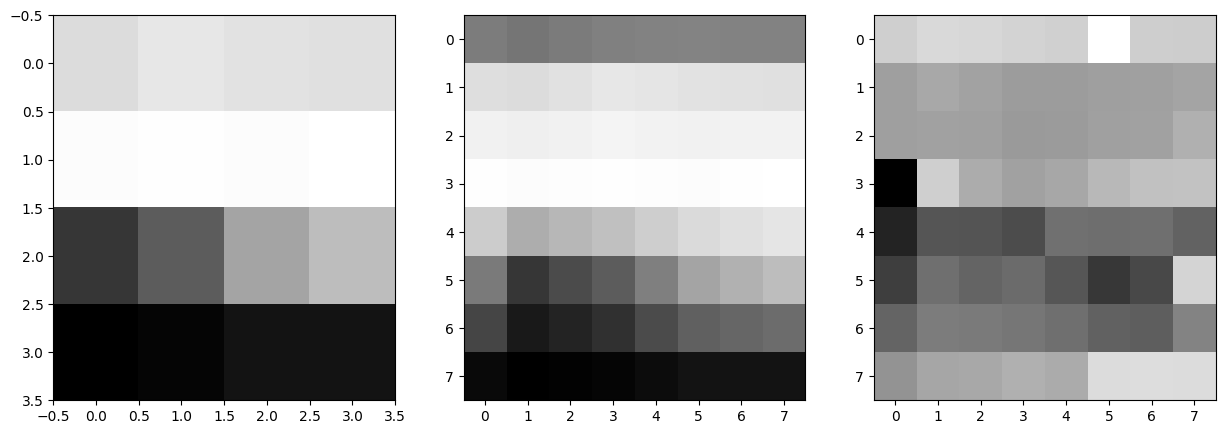

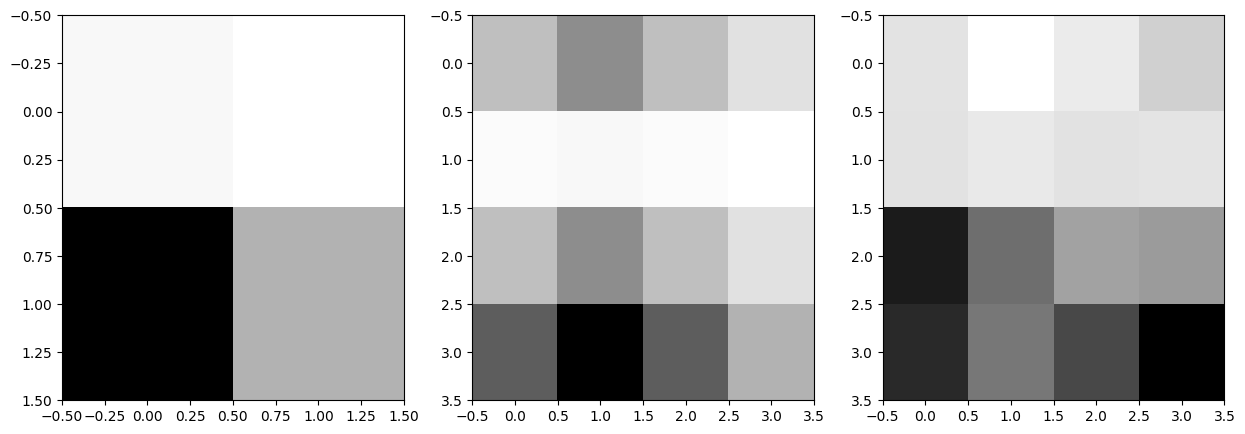

In [143]:
image = np.asarray(Image.open("pexels-james-wheeler-414612.jpg"))
gimage= image_2_rgb(image)
opt_width = int(np.log2(gimage.shape[1]))
opt_height = int(np.log2(gimage.shape[0]))
opt_min = 2**min(opt_width,opt_height)
opt_image=gimage[:opt_min,:opt_min]
plt.imshow(255-opt_image,cmap='Grays')
plt.show()

new_image = opt_image
for i in range(10):
    f,axis = plt.subplots(1,3,figsize=(15,5))
    prv = new_image
    new_image = reduce_image(new_image)
    axis[0].imshow(255-new_image,cmap='Grays',aspect='auto')
    exp = image_expend(new_image)
    axis[1].imshow(255-exp,cmap='Grays',aspect='auto')
    axis[2].imshow(255-(prv-exp),cmap='Grays',aspect='auto')
    plt.show()

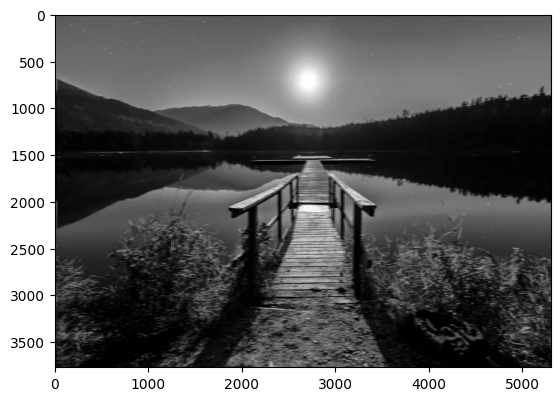

In [167]:

def convolve2d(x, kernel):
    k = np.pad(kernel,((0,(kernel.shape[0]-1)%2),(0,(kernel.shape[1]-1)%2)))
    k = k[::-1,::-1]
    kh,kw = k.shape[0],k.shape[1]
    im = np.pad(x,((kh,kh),(kw,kw)))
    h,w = im.shape
    # layers = np.zeros((k.shape[0]*k.shape[1],x.shape[0],x.shape[1]))
    new_x = np.zeros((h,w))
    for i,row in enumerate(k):
        for j,cell in enumerate(row):
            new_x[kh:-kh,kw:-kw] += cell*im[kh-i:-kh-i,kw-j:-kw-j]
    return new_x[kh:-kh,kw:-kw]

def get_gaussian(size = 4):
    from math import comb
    kernel = np.zeros((size*2-1,size*2-1))
    for i in range(size):
        for j in range(size):
            kernel[i,j] = kernel[-i-1,j] = kernel[i,-j-1] = kernel[-i-1,-j-1]=comb(size+1+2*i,i+j)
    return kernel/np.sum(kernel)

im = kernel_convolution(gimage,get_gaussian(20))
plt.imshow(255-im,cmap='Grays')
plt.show()